Install

In [ ]:
#pip install --upgrade jaxlib
!pip install jaxlib==0.4.23
!pip install jax==0.4.23

In [ ]:
pip install --upgrade e3nn-jax

In [ ]:
!pip install -q git+https://www.github.com/google/jax-md

In [ ]:
pip install sympy

In [ ]:
pip install scikit-image

Imports

In [ ]:
import jax.numpy as np
import numpy as onp
import time
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

from jax.nn import relu
from jax import jit
from jax import vmap, pmap
from jax import lax
from jax import random
from jax import grad, value_and_grad, hessian, jacfwd, jacrev, jvp

from jax_md import space
from jax_md import quantity
from jax_md.quantity import box_size_at_number_density

#from jax.config import config
#config.update('jax_enable_x64', True)

from sympy import symbols
from sympy.plotting import plot
from sympy import diff, tanh

from scipy.sparse import csgraph

from functools import partial

import math
import matplotlib.pyplot as plt
#import numpy as np
import pandas as pd

from skimage.draw import ellipse
from skimage.measure import label, regionprops, regionprops_table
from skimage.transform import rotate

Predefined functions

In [ ]:
displacement, shift = space.free()
metric = space.metric(displacement)
displacement = space.map_product(displacement)
metric = space.map_product(metric)

Model parameters

In [ ]:
epsilon = 0.01
alpha = 8

eta_1 = 1e-2
eta_2 = 1e-8

Initialization

1. Square lattice

In [ ]:
def square_lattice(N, box_size):
  Nx = int(np.sqrt(N))
  Ny, ragged = divmod(N, Nx)
  if Ny != Nx or ragged:
    assert ValueError('Particle count should be a square. Found {}.'.format(N))
  length_scale = box_size / (Nx-1)
  R = []
  for i in range(Nx):
    for j in range(Ny):
      R.append([i * length_scale, j * length_scale])
  return np.array(R)

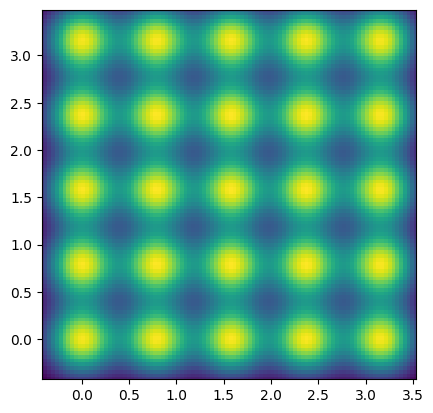

In [ ]:
N = 25
dim = 2

box_size = box_size_at_number_density(particle_count = N, number_density = N/10, spatial_dimension = dim)
R_target = square_lattice(N, box_size)

def phi_field(x):
    return np.einsum('i->', np.exp(np.squeeze(- alpha*np.square(metric(x, R_target)))))

batch_phi_field = vmap(phi_field)

n = 100

xmin = np.min(R0[:,0]) - 0.5
xmax = np.max(R0[:,0]) + 0.5
ymin = np.min(R0[:,1]) - 0.5
ymax = np.max(R0[:,1]) + 0.5

X, Y = np.mgrid[xmin:xmax:(n*1j), ymin:ymax:(n*1j)]
positions = np.transpose(np.vstack([X.ravel(), Y.ravel()]))
positions_list = np.reshape(positions, (n*n,1,2))

fig, ax = plt.subplots()

ax.set_xlim(xmin, xmax)
ax.set_ylim(ymin, ymax)
ax.grid(False)
ax.set_aspect('equal', adjustable='box')
ax.pcolormesh(X, Y, np.reshape(batch_phi_field(positions_list), (n,n)))

plt.show()


In [ ]:
R0

Array([[0.0752361 , 2.696539  ],
       [2.5716226 , 1.6254941 ],
       [0.54305184, 2.538318  ],
       [1.6205508 , 1.1016881 ],
       [1.5978011 , 1.0658525 ],
       [0.34368417, 0.33269176],
       [2.650854  , 2.4977734 ],
       [1.0770673 , 2.6402721 ],
       [0.7771496 , 0.67632836],
       [0.07662936, 1.7763853 ],
       [0.8875491 , 2.9841297 ],
       [1.9357883 , 2.3348324 ],
       [1.65766   , 2.0702398 ],
       [1.2969378 , 0.7598528 ],
       [2.3540967 , 0.11210076],
       [2.6911428 , 0.0769868 ],
       [1.4938519 , 2.2991912 ],
       [1.1085503 , 1.9840673 ],
       [1.9314417 , 0.2063619 ],
       [2.5588927 , 0.67381316],
       [2.044515  , 1.0261639 ],
       [1.7515489 , 2.7985547 ],
       [3.0330074 , 2.6517866 ],
       [1.5469682 , 0.37348324],
       [0.53547335, 2.6454692 ]], dtype=float32)

2. Random cloud of droplets

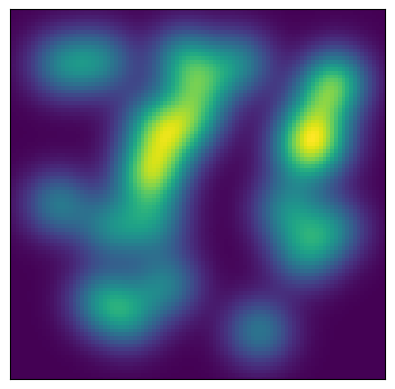

In [ ]:
N = 25
dim = 2

box_size = box_size_at_number_density(particle_count = N, number_density = N/10, spatial_dimension = dim)
R0 = random.uniform(random.PRNGKey(3), (N, dim), maxval=box_size)

def phi_field(x):
    return np.einsum('i->', np.exp(np.squeeze(-alpha*np.square(metric(x, R0)))))

batch_phi_field = vmap(phi_field)

n = 100

xmin = np.min(R0[:,0]) - 0.5
xmax = np.max(R0[:,0]) + 0.5
ymin = np.min(R0[:,1]) - 0.5
ymax = np.max(R0[:,1]) + 0.5

X, Y = np.mgrid[xmin:xmax:(n*1j), ymin:ymax:(n*1j)]
positions = np.transpose(np.vstack([X.ravel(), Y.ravel()]))
positions_list = np.reshape(positions, (n*n,1,2))

fig, ax = plt.subplots()

ax.set_xlim(xmin, xmax)
ax.set_ylim(ymin, ymax)
ax.grid(False)
ax.set_aspect('equal', adjustable='box')
ax.set_xticks([])
ax.set_yticks([])
ax.pcolormesh(X, Y, np.reshape(batch_phi_field(positions_list), (n,n)))

plt.show()


In [ ]:
R0

Array([[0.       , 0.       ],
       [0.       , 0.7905694],
       [0.       , 1.5811388],
       [0.       , 2.3717084],
       [0.       , 3.1622777],
       [0.7905694, 0.       ],
       [0.7905694, 0.7905694],
       [0.7905694, 1.5811388],
       [0.7905694, 2.3717084],
       [0.7905694, 3.1622777],
       [1.5811388, 0.       ],
       [1.5811388, 0.7905694],
       [1.5811388, 1.5811388],
       [1.5811388, 2.3717084],
       [1.5811388, 3.1622777],
       [2.3717084, 0.       ],
       [2.3717084, 0.7905694],
       [2.3717084, 1.5811388],
       [2.3717084, 2.3717084],
       [2.3717084, 3.1622777],
       [3.1622777, 0.       ],
       [3.1622777, 0.7905694],
       [3.1622777, 1.5811388],
       [3.1622777, 2.3717084],
       [3.1622777, 3.1622777]], dtype=float32)

In [ ]:
box_size

Array(3.1622777, dtype=float32, weak_type=True)

In [ ]:
N=25
dim=2

In [ ]:
R0 = random.uniform(random.PRNGKey(0), (N, dim), maxval=3.16227766)

In [ ]:
R0

Array([[0.0752361 , 2.696539  ],
       [2.5716226 , 1.6254941 ],
       [0.54305184, 2.538318  ],
       [1.6205508 , 1.1016881 ],
       [1.5978011 , 1.0658525 ],
       [0.34368417, 0.33269176],
       [2.650854  , 2.4977734 ],
       [1.0770673 , 2.6402721 ],
       [0.7771496 , 0.67632836],
       [0.07662936, 1.7763853 ],
       [0.8875491 , 2.9841297 ],
       [1.9357883 , 2.3348324 ],
       [1.65766   , 2.0702398 ],
       [1.2969378 , 0.7598528 ],
       [2.3540967 , 0.11210076],
       [2.6911428 , 0.0769868 ],
       [1.4938519 , 2.2991912 ],
       [1.1085503 , 1.9840673 ],
       [1.9314417 , 0.2063619 ],
       [2.5588927 , 0.67381316],
       [2.044515  , 1.0261639 ],
       [1.7515489 , 2.7985547 ],
       [3.0330074 , 2.6517866 ],
       [1.5469682 , 0.37348324],
       [0.53547335, 2.6454692 ]], dtype=float32)

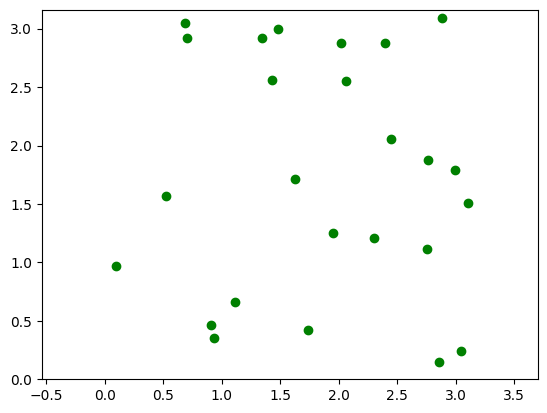

In [ ]:
import matplotlib.pyplot as plt

# Assuming R0 is a 2D numpy array or list of shape (N, 2)
# Example: R0 = [[x1, y1], [x2, y2], [x3, y3], ...]

def scatter_plot(R0):
    # Extracting x and y coordinates
    x_coords = [point[0] for point in R0]
    y_coords = [point[1] for point in R0]

    # Create scatter plot
    plt.scatter(x_coords, y_coords, c='green', marker='o')
    # plt.xlabel('X')
    # plt.ylabel('Y')
    #plt.title('2D Point Cloud Scatter Plot')
    #plt.grid(True)
    plt.axis('equal')  # To ensure equal scaling on both axes
    plt.xlim(0, 3.16227766)
    plt.ylim(0, 3.16227766)
    #plt.xticks([])
   # plt.yticks([])
    plt.show()

scatter_plot(R0)

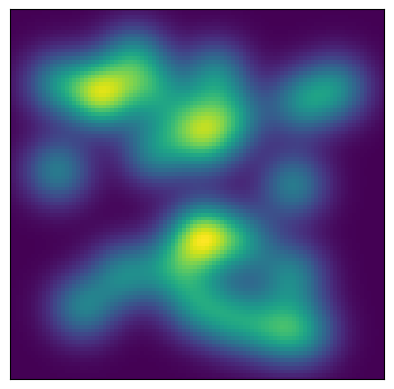

In [ ]:
def phi_field(x):
    return np.einsum('i->', np.exp(np.squeeze(-alpha*np.square(metric(x, R0)))))

batch_phi_field = vmap(phi_field)

n = 100

xmin = np.min(R0[:,0]) - 0.5
xmax = np.max(R0[:,0]) + 0.5
ymin = np.min(R0[:,1]) - 0.5
ymax = np.max(R0[:,1]) + 0.5

X, Y = np.mgrid[xmin:xmax:(n*1j), ymin:ymax:(n*1j)]
positions = np.transpose(np.vstack([X.ravel(), Y.ravel()]))
positions_list = np.reshape(positions, (n*n,1,2))

fig, ax = plt.subplots()

ax.set_xlim(xmin, xmax)
ax.set_ylim(ymin, ymax)
ax.grid(False)
ax.set_aspect('equal', adjustable='box')
ax.set_xticks([])
ax.set_yticks([])
ax.pcolormesh(X, Y, np.reshape(batch_phi_field(positions_list), (n,n)))

plt.show()


Potential

Eulerian domain

In [ ]:
n = 100
xmin = np.min(R0[:,0]) - 0.5
xmax = np.max(R0[:,0]) + 0.5
ymin = np.min(R0[:,1]) - 0.5
ymax = np.max(R0[:,1]) + 0.5
X, Y = np.mgrid[xmin:xmax:(n*1j), ymin:ymax:(n*1j)]
positions = np.transpose(np.vstack([X.ravel(), Y.ravel()]))
positions_list = np.reshape(positions, (n*n,1,2))

In [ ]:
def lub_energy(R):

  surf_tension = 0.001*1e0
  eta = 1e1
  beta = 10
  dx2 = ((xmax-xmin)/n)**2

  def phi_field(x):
    return np.einsum('i->', np.exp(np.squeeze(- alpha*np.square(metric(x, R)))))

  def grad_phi_field(x):
    return jacrev(phi_field, argnums=0)(x)

  batch_phi_field = vmap(phi_field)
  batch_grad_phi_field = vmap(grad_phi_field)

  return 0.0001*dx2*np.einsum('i->', -((batch_phi_field(positions_list))**2 - eta)*(np.exp(-beta*(batch_phi_field(positions_list))**2)) + surf_tension*np.einsum('ij->i', np.square(np.squeeze(batch_grad_phi_field(positions_list)))) )


In [ ]:
def boundedness(R):
  #def phi_field(x):
   # return np.einsum('i,i->', np.exp(np.squeeze(- alpha*np.square(metric(x, R)))), np.ones((R0.shape[0],1))[:,0])
  #batch_phi_field = vmap(phi_field)
  #phi_grid = np.reshape(batch_phi_field(positions_list), (n,n))
  return 1e0*np.einsum('ij->', np.square(relu(metric(np.array([[box_size/2, box_size/2]]), R) - box_size/8)))

#Uncontrolled

In [ ]:
R_iter = []
R_iter.append(R0)

t0 = 0.0
t1 = 10.0
dt = 0.01

D_R = 0.0

for i in range(int((t1-t0)/dt)):
  R_iter.append(R_iter[-1] - dt*jacrev(lub_energy, argnums=0)(R_iter[-1]) + np.sqrt(2*D_R*dt)*random.normal(random.PRNGKey(int(time.time())), shape=R_iter[-1].shape))

In [ ]:
len(R_iter)

148

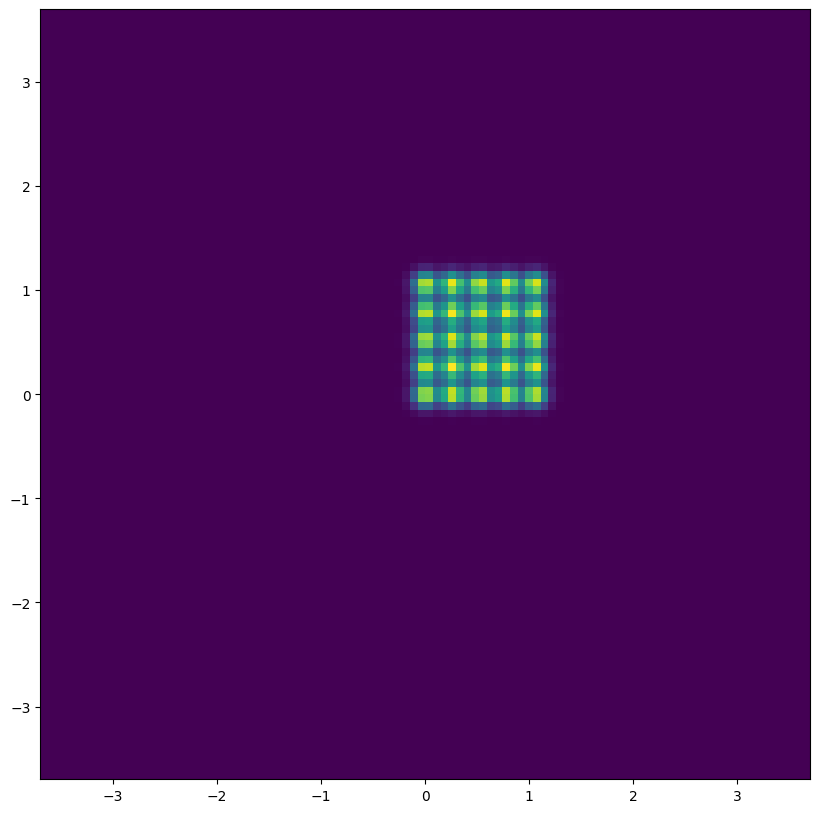

In [ ]:
from matplotlib.animation import FuncAnimation, PillowWriter

fig_size = (10,10)
fig, ax = plt.subplots(figsize=fig_size)

ax.set_xlim(xmin, xmax)
ax.set_ylim(ymin, ymax)
ax.grid(False)
ax.set_aspect('equal', adjustable='box')

def animate(j):
  k = 10*j
  ax.clear()

  R = R_iter[k]

  def phi_field(x):
    return np.einsum('i->', np.exp(np.squeeze(- alpha*np.square(metric(x, R)))))
  batch_phi_field = vmap(phi_field)

  phi_eval_euler = np.reshape(batch_phi_field(positions_list), (n,n))
  fgrnd1 = ax.pcolormesh(X, Y, phi_eval_euler)

  return fgrnd1

ani = FuncAnimation(fig, animate, interval=50, blit=False, repeat=True, frames=int(len(R_iter)/10)-1)
ani.save("droplet_uncontrolled.gif", dpi=300, writer=PillowWriter(fps=10))

#Controlled

Terminal Cost

In [ ]:
R_target = square_lattice(N, box_size)

In [ ]:
R_target

Array([[0.       , 0.       ],
       [0.       , 0.7905694],
       [0.       , 1.5811388],
       [0.       , 2.3717084],
       [0.       , 3.1622777],
       [0.7905694, 0.       ],
       [0.7905694, 0.7905694],
       [0.7905694, 1.5811388],
       [0.7905694, 2.3717084],
       [0.7905694, 3.1622777],
       [1.5811388, 0.       ],
       [1.5811388, 0.7905694],
       [1.5811388, 1.5811388],
       [1.5811388, 2.3717084],
       [1.5811388, 3.1622777],
       [2.3717084, 0.       ],
       [2.3717084, 0.7905694],
       [2.3717084, 1.5811388],
       [2.3717084, 2.3717084],
       [2.3717084, 3.1622777],
       [3.1622777, 0.       ],
       [3.1622777, 0.7905694],
       [3.1622777, 1.5811388],
       [3.1622777, 2.3717084],
       [3.1622777, 3.1622777]], dtype=float32)

In [ ]:
def terminal_cost(R):

  # dx2 = ((xmax-xmin)/n)**2

   def phi_field(x):
     return np.einsum('i->', np.exp(np.squeeze(- alpha*np.square(metric(x, R)))))

   def phi_field_target(x):
     return np.einsum('i->', np.exp(np.squeeze(-alpha*np.square(metric(x, R_target)))))

   batch_phi_field = vmap(phi_field)
   batch_phi_field_target = vmap(phi_field_target)

   phi_eval_euler = batch_phi_field(positions_list)
   phi_eval_euler_target = batch_phi_field_target(positions_list)

  #  return 1e-1*np.einsum('i,i->' , phi_eval_euler-phi_eval_euler_target, phi_eval_euler-phi_eval_euler_target)+100000*np.einsum('ij->', np.square(relu(metric(np.array([[box_size/2, box_size/2]]), R) - box_size/2)))
   return 1e-2*np.einsum('i,i->' , phi_eval_euler-phi_eval_euler_target, phi_eval_euler-phi_eval_euler_target)


In [ ]:
#gamma_R = 1e0
#gamma_phi = 2e-1
#rk_array = np.array([0.0, 0.4, 0.8, 1.2])
#rk_array = np.array([0.0, 0.4, 0.8])
#n = 100
#xmin = np.min(R0[:,0]) - 0.5
#xmax = np.max(R0[:,0]) + 0.5
#ymin = np.min(R0[:,1]) - 0.5
#ymax = np.max(R0[:,1]) + 0.5
#X, Y = np.mgrid[xmin:xmax:(n*1j), ymin:ymax:(n*1j)]
#positions = np.transpose(np.vstack([X.ravel(), Y.ravel()]))
#positions_list = np.reshape(positions, (n*n,1,2))
#radial_dist = np.reshape(metric(np.reshape(np.array([box_size/2, box_size/2]), (1,2)), np.reshape(positions_list, (n*n,2))), (n,n))
#radial_poly = np.reshape(np.prod(np.power(metric(np.reshape(rk_array,(rk_array.size,1)), np.reshape(radial_dist, (n*n,1))), 0.1), axis=1), (n,n))

#def terminal_cost(R):
  #R = Z[0:N,:]
  #phi = Z[N:2*N,:]

#  def phi_field(x):
#    return np.einsum('i->', np.exp(np.squeeze(- alpha*np.square(metric(x, R)))))
#  batch_phi_field = vmap(phi_field)

#  phi_grid = np.reshape(batch_phi_field(positions_list), (n,n))

#  return 100*np.einsum('ij,ij->', radial_poly, phi_grid) + 100000*np.einsum('ij->', np.square(relu(metric(np.array([[box_size/2, box_size/2]]), R) - box_size/2)))

Feynman-Kac adjoint method

In [ ]:
D_R = 0.001

t0, t1 = 0, 0.01
dt = 0.01

n_samples = 1

Compute control

In [ ]:
def ctrl(R):

  R_iter_ctrl = []
  R_iter_ctrl.append(R)

  for k in range(int((t1-t0)/dt)):
    R_iter_ctrl.append(R_iter_ctrl[-1] - dt*jacrev(lub_energy, argnums=0)(R_iter_ctrl[-1]) + np.sqrt(2*D_R*dt)*random.normal(random.PRNGKey(int(time.time())), shape=R_iter_ctrl[-1].shape))

  Lambda_R_iter = []
  Lambda_R_iter.append(jacrev(terminal_cost, argnums=0)(R_iter_ctrl[-1]))

  for t in range(int((t1-t0)/dt)):
    ind = int(t1/dt)-t
    Lambda_R_iter.append(Lambda_R_iter[-1] + dt*(np.einsum('ij,ijkl->kl', Lambda_R_iter[-1], -jacfwd(jacrev(lub_energy, argnums=0), argnums=0)(R_iter_ctrl[ind]))))

  return -Lambda_R_iter[-1]

In [ ]:
R_iter = []
R_iter.append(R0)

ctrl_R_lagrangian = []
cost=[]

In [ ]:
t = 0.0

while(np.sqrt(terminal_cost(R_iter[-1])) > 1e-2):

  print(t, np.sqrt(terminal_cost(R_iter[-1])))
  cost.append(np.sqrt(terminal_cost(R_iter[-1])))
  t = t + dt

  u_R = ctrl(R_iter[-1])

  ctrl_R_lagrangian.append(u_R)

  R_iter.append(R_iter[-1] - dt*jacrev(lub_energy, argnums=0)(R_iter[-1]) + dt*u_R + np.sqrt(2*D_R*dt)*random.normal(random.PRNGKey(int(time.time())), shape=R_iter[-1].shape))

0.0 1.1711701
0.01 1.1731269
0.02 1.1692486
0.03 1.1693579
0.04 1.1708469
0.05 1.1675028
0.060000000000000005 1.1646616
0.07 1.1632695
0.08 1.1590564
0.09 1.1634638
0.09999999999999999 1.1568146
0.10999999999999999 1.1587898
0.11999999999999998 1.1548595
0.12999999999999998 1.1525162
0.13999999999999999 1.1512501
0.15 1.1498287
0.16 1.1483701
0.17 1.1469256
0.18000000000000002 1.1449678
0.19000000000000003 1.1410081
0.20000000000000004 1.1413995
0.21000000000000005 1.138402
0.22000000000000006 1.1375312
0.23000000000000007 1.1367279
0.24000000000000007 1.1333742
0.25000000000000006 1.1324831
0.26000000000000006 1.1317306
0.2700000000000001 1.1299412
0.2800000000000001 1.1274107
0.2900000000000001 1.1240053
0.3000000000000001 1.120922
0.3100000000000001 1.1179304
0.3200000000000001 1.1083164
0.3300000000000001 1.1043837
0.34000000000000014 1.0979141
0.35000000000000014 1.0895509
0.36000000000000015 1.0801721
0.37000000000000016 1.0754335
0.38000000000000017 1.0659877
0.3900000000000002 

KeyboardInterrupt: 

In [ ]:
len(R_iter)

227

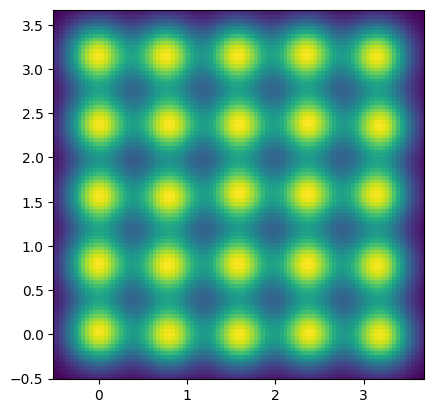

In [ ]:
R = R_iter[-1]

n = 100

xmin = np.min(R[:,0]) - 0.5
xmax = np.max(R[:,0]) + 0.5
ymin = np.min(R[:,1]) - 0.5
ymax = np.max(R[:,1]) + 0.5

X, Y = np.mgrid[xmin:xmax:(n*1j), ymin:ymax:(n*1j)]
positions = np.transpose(np.vstack([X.ravel(), Y.ravel()]))
positions_list = np.reshape(positions, (n*n,1,2))

def phi_field(x):
     return np.einsum('i->', np.exp(np.squeeze(-alpha*np.square(metric(x, R)))))

batch_phi_field = vmap(phi_field)

fig, ax = plt.subplots()

ax.set_xlim(xmin, xmax)
ax.set_ylim(ymin, ymax)
ax.grid(False)
ax.set_aspect('equal', adjustable='box')
ax.pcolormesh(X, Y, np.reshape(batch_phi_field(positions_list), (n,n)))

plt.show()


In [ ]:
len(R_iter)

136

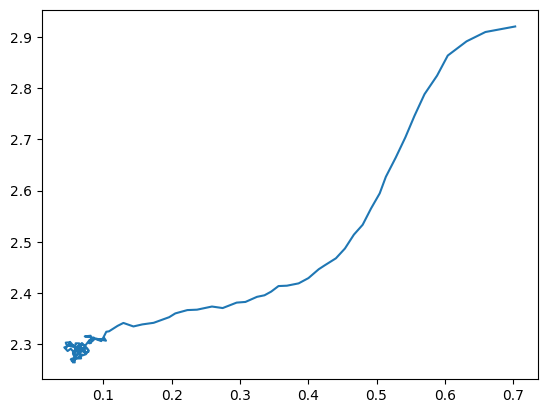

In [ ]:
x_traj=np.array(R_iter)[:,0,0]
y_traj=np.array(R_iter)[:,0,1]
plt.plot(x_traj,y_traj)

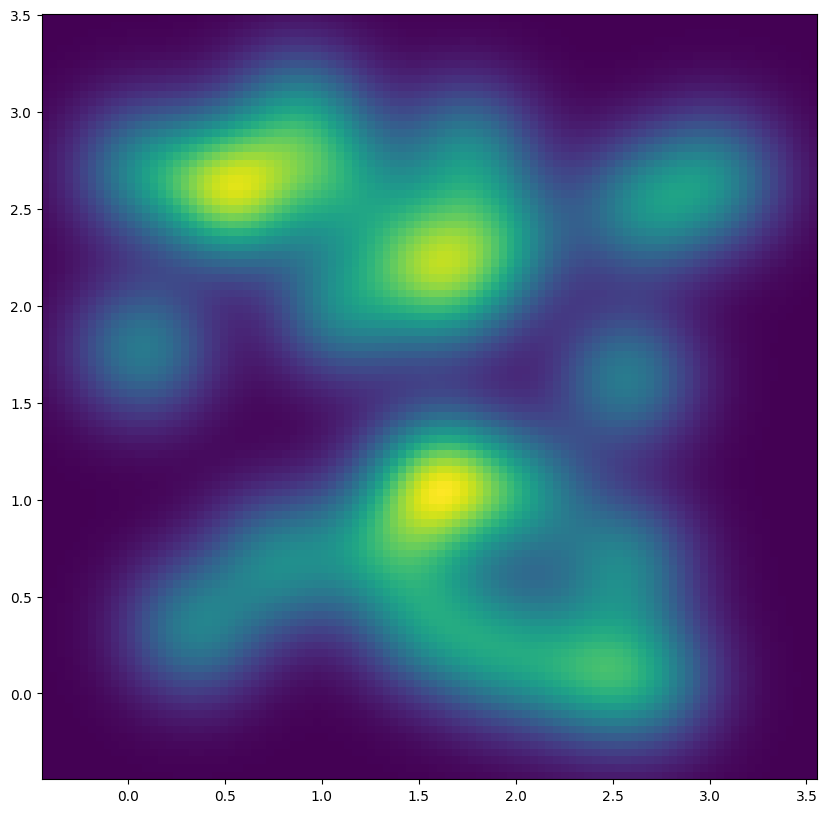

In [ ]:
from matplotlib.animation import FuncAnimation, PillowWriter

fig_size = (10,10)
fig, ax = plt.subplots(figsize=fig_size)

ax.set_xlim(xmin, xmax)
ax.set_ylim(ymin, ymax)
ax.grid(False)
ax.set_aspect('equal', adjustable='box')

def animate(j):
  #print(j)
  k = int(len(R_iter)/len(R_iter))*j
  #k=j
  ax.clear()

  R = R_iter[k]

  def phi_field(x):
    return np.einsum('i->', np.exp(np.squeeze(- alpha*np.square(metric(x, R)))))
  batch_phi_field = vmap(phi_field)

  phi_eval_euler = np.reshape(batch_phi_field(positions_list), (n,n))
  fgrnd1 = ax.pcolormesh(X, Y, phi_eval_euler)

  return fgrnd1

ani = FuncAnimation(fig, animate, interval=50, blit=False, repeat=True, frames=len(R_iter))
ani.save("droplet_controlled_new.gif", dpi=300, writer=PillowWriter(fps=10))

In [ ]:
pwd

'/content/drive/MyDrive/generative_pattern_formation/droplet/25_particles'

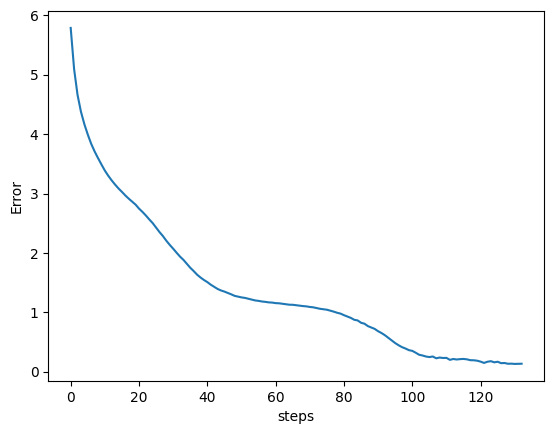

In [ ]:
plt.plot(cost)
plt.xlabel('steps')
plt.ylabel('Error')
plt.savefig('error.pdf',bbox_inches='tight')

In [ ]:
free_energy=[]
for i in range(len(R_iter)):
  free_energy.append(lub_energy(R_iter[i]))

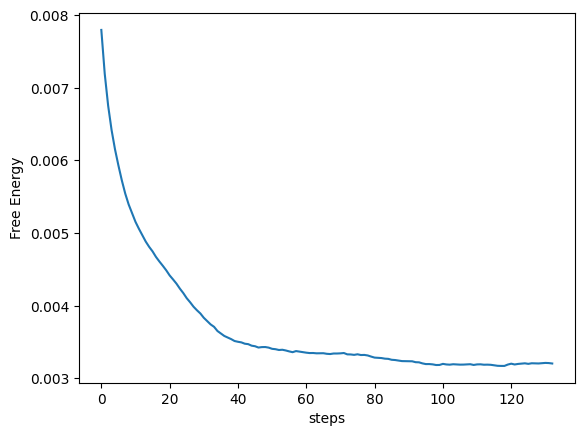

In [ ]:
plt.plot(free_energy)
plt.xlabel('steps')
plt.ylabel('Free Energy')
plt.savefig('free_energy.pdf',bbox_inches='tight')

In [ ]:
control_cost=[]
for i in range(len(ctrl_R_lagrangian)):
  control_cost.append(np.sum(np.square(ctrl_R_lagrangian[i])))

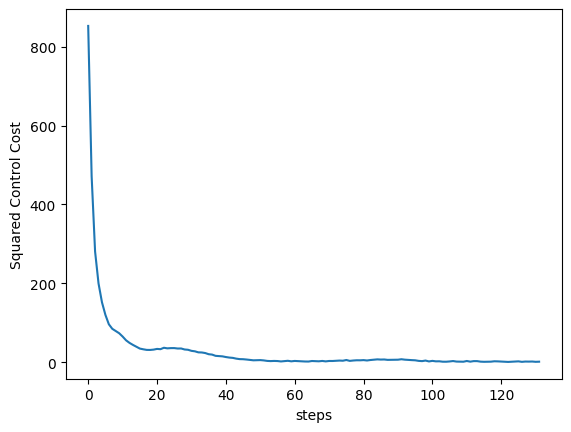

In [ ]:
plt.plot(control_cost)
plt.xlabel('steps')
plt.ylabel('Squared Control Cost')
plt.savefig('Squared Control Cost.pdf',bbox_inches='tight')

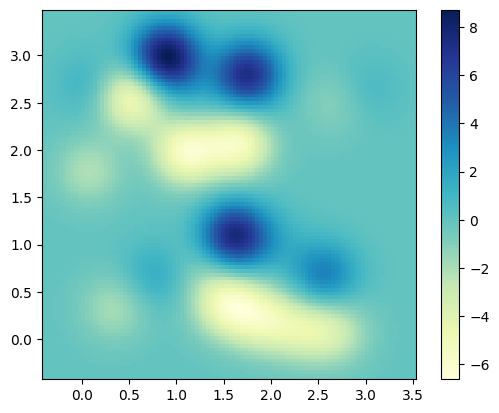

In [ ]:
R_control = ctrl_R_lagrangian[0]
R=R_iter[0]

n = 100

xmin = np.min(R0[:,0]) - 0.5
xmax = np.max(R0[:,0]) + 0.5
ymin = np.min(R0[:,1]) - 0.5
ymax = np.max(R0[:,1]) + 0.5

X, Y = np.mgrid[xmin:xmax:(n*1j), ymin:ymax:(n*1j)]
positions = np.transpose(np.vstack([X.ravel(), Y.ravel()]))
positions_list = np.reshape(positions, (n*n,1,2))

def velocity_control_field_x(x):
    return np.einsum('i->', np.multiply(np.exp(np.squeeze(- alpha*np.square(metric(x, R)))), R_control[:,0]))

def velocity_control_field_y(x):
    return np.einsum('i->', np.multiply(np.exp(np.squeeze(- alpha*np.square(metric(x, R)))), R_control[:,1]))
batch_velocity_control_field_x = vmap(velocity_control_field_x)
batch_velocity_control_field_y = vmap(velocity_control_field_y)

fig, ax = plt.subplots()

ax.set_xlim(xmin, xmax)
ax.set_ylim(ymin, ymax)
ax.grid(False)
ax.set_aspect('equal', adjustable='box')
im = ax.pcolormesh(X, Y, np.reshape(batch_velocity_control_field_y(positions_list), (n,n)),cmap='YlGnBu')
fig.colorbar(im, ax=ax)

plt.show()

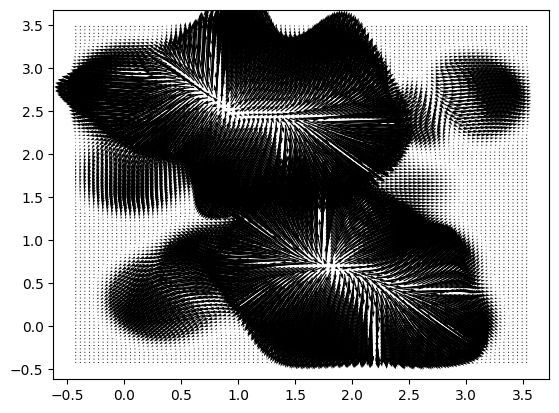

In [ ]:
import numpy as onp
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from mpl_toolkits.axes_grid1 import make_axes_locatable
fig = plt.figure()

ax = fig.add_subplot(111)
#div = make_axes_locatable(ax)
#cax = div.append_axes('right', '5%', '5%')
im=ax.quiver(X, Y,np.reshape(batch_velocity_control_field_x(positions_list), (n,n)),np.reshape(batch_velocity_control_field_y(positions_list), (n,n)), scale=50)
#fig.colorbar(im, cax=cax)

IndexError: list index out of range

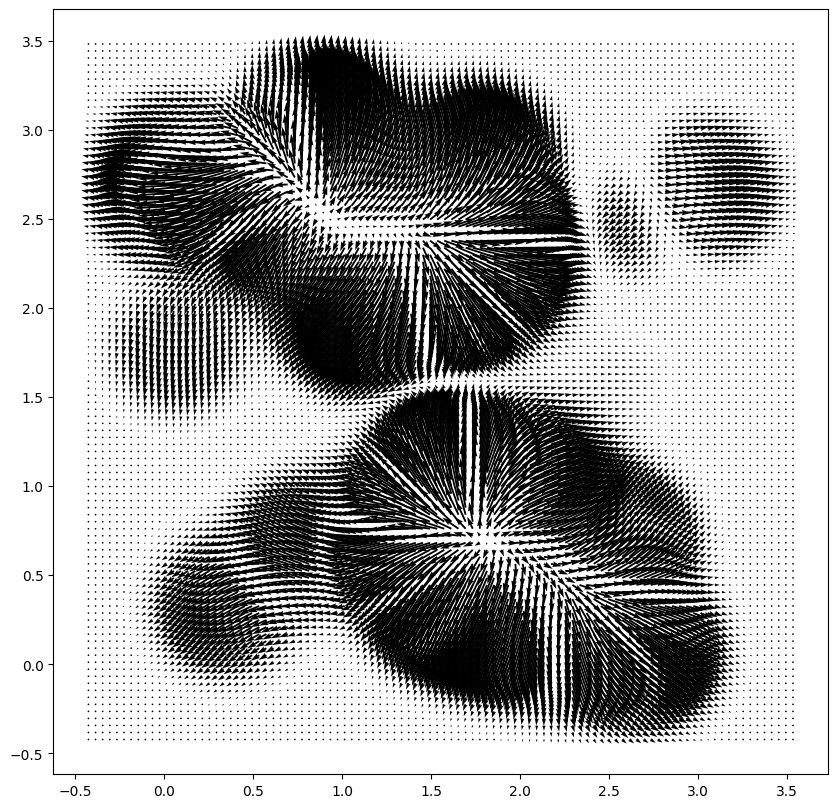

In [ ]:
no_of_frames=len(R_iter)
from matplotlib.animation import FuncAnimation, PillowWriter

fig_size = (10,10)
fig, ax = plt.subplots(figsize=fig_size)

ax.set_xlim(xmin, xmax)
ax.set_ylim(ymin, ymax)
ax.grid(False)
ax.set_aspect('equal', adjustable='box')

def animate(j):
  #print(j)
  #k = int(len(C_iter)/no_of_frames)*j
  #k=j
  ax.clear()

  R = R_iter[j]
  R_control = ctrl_R_lagrangian[j]



  def velocity_control_field_x(x):
    return np.einsum('i->', np.multiply(np.exp(np.squeeze(- alpha*np.square(metric(x, R)))), R_control[:,0]))

  def velocity_control_field_y(x):
    return np.einsum('i->', np.multiply(np.exp(np.squeeze(- alpha*np.square(metric(x, R)))), R_control[:,1]))
  batch_velocity_control_field_x = vmap(velocity_control_field_x)
  batch_velocity_control_field_y = vmap(velocity_control_field_y)

  im=ax.quiver(X, Y,np.reshape(batch_velocity_control_field_x(positions_list), (n,n)),np.reshape(batch_velocity_control_field_y(positions_list), (n,n)), scale=100)
#fig.colorbar(im, cax=cax)

  return im

ani = FuncAnimation(fig, animate, interval=50, blit=False, repeat=True, frames=no_of_frames)
ani.save("droplet_quiver_new.gif", dpi=300, writer=PillowWriter(fps=5))

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cd generative_pattern_formation/droplet/

/content/drive/MyDrive/generative_pattern_formation/droplet


In [ ]:
cd 25_particles/

/content/drive/MyDrive/generative_pattern_formation/droplet/25_particles


In [ ]:
ls

 control_cost_25_particles_new.npy        error.pdf
 cost_25_particles_new.npy                free_energy_25_particles_new.npy
 ctrl_R_lagrangian_25_particles_new.npy   free_energy.pdf
 droplet_controlled.gif                   R_iter_25_particles_eulerian_terminal_cost.npy
 droplet_controlled_new.gif               R_iter_25_particles_new.npy
 droplet_quiver_new.gif                  'Squared Control Cost.pdf'


In [ ]:
np.save('R_iter_25_particles_new', R_iter, allow_pickle=True)

In [ ]:
np.save('cost_25_particles_new', cost, allow_pickle=True)

In [ ]:
np.save('free_energy_25_particles_new', free_energy, allow_pickle=True)

In [ ]:
np.save('control_cost_25_particles_new', control_cost, allow_pickle=True)

In [ ]:
np.save('ctrl_R_lagrangian_25_particles_new', ctrl_R_lagrangian, allow_pickle=True)

In [ ]:
R_iter=np.load('R_iter_25_particles_eulerian_terminal_cost.npy', allow_pickle=True)

In [ ]:
R0 = R_iter[0]

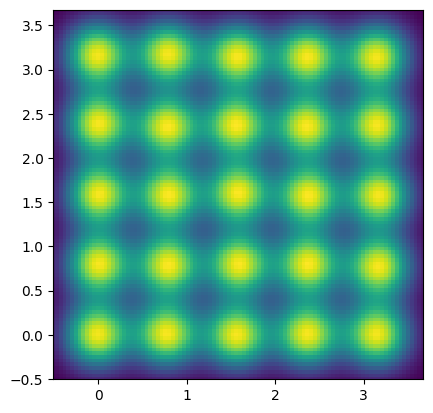

In [ ]:
R = R_iter[-1]

n = 100

xmin = np.min(R[:,0]) - 0.5
xmax = np.max(R[:,0]) + 0.5
ymin = np.min(R[:,1]) - 0.5
ymax = np.max(R[:,1]) + 0.5

X, Y = np.mgrid[xmin:xmax:(n*1j), ymin:ymax:(n*1j)]
positions = np.transpose(np.vstack([X.ravel(), Y.ravel()]))
positions_list = np.reshape(positions, (n*n,1,2))

def phi_field(x):
     return np.einsum('i->', np.exp(np.squeeze(-alpha*np.square(metric(x, R)))))

batch_phi_field = vmap(phi_field)

fig, ax = plt.subplots()

ax.set_xlim(xmin, xmax)
ax.set_ylim(ymin, ymax)
ax.grid(False)
ax.set_aspect('equal', adjustable='box')
ax.pcolormesh(X, Y, np.reshape(batch_phi_field(positions_list), (n,n)))

plt.show()

In [ ]:
ls

droplet_controlled.gif  R_iter_25_particles_eulerian_terminal_cost.npy


## Control of gaussian mixtures

In [ ]:
n = 100
xmin = np.min(R0[:,0]) - 0.5
xmax = np.max(R0[:,0]) + 0.5
ymin = np.min(R0[:,1]) - 0.5
ymax = np.max(R0[:,1]) + 0.5
X, Y = np.mgrid[xmin:xmax:(n*1j), ymin:ymax:(n*1j)]
positions = np.transpose(np.vstack([X.ravel(), Y.ravel()]))
positions_list = np.reshape(positions, (n*n,1,2))

In [ ]:
N = 10
dim = 2

box_size = box_size_at_number_density(particle_count = N, number_density = N/10, spatial_dimension = dim)
R0 = random.uniform(random.PRNGKey(0), (N, dim), maxval=box_size)
alpha0 = random.uniform(random.PRNGKey(0), (N,), maxval=1/(box_size/10)**2)

def phi_field(x):
  return np.einsum('i->', np.exp(np.multiply(alpha0, np.squeeze(-np.square(metric(x, R0))))))

batch_phi_field = vmap(phi_field)

(10,)


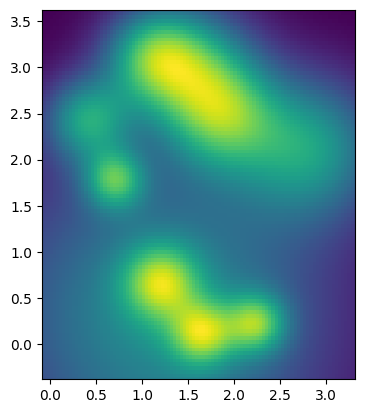

In [ ]:
fig, ax = plt.subplots()

ax.set_xlim(xmin, xmax)
ax.set_ylim(ymin, ymax)
ax.grid(False)
ax.set_aspect('equal', adjustable='box')

ax.pcolormesh(X, Y, np.reshape(batch_phi_field(positions_list), (n,n)))

plt.show()

In [ ]:
def lub_energy_GMM(R, alpha):

  surf_tension = 2e0
  eta = 1e1
  beta = 10
  dx2 = ((xmax-xmin)/n)**2

  def phi_field(x):
    return np.einsum('i->', np.exp(np.multiply(alpha, np.squeeze(-np.square(metric(x, R))))))

  def grad_phi_field(x):
    return jacrev(phi_field, argnums=0)(x)

  batch_phi_field = vmap(phi_field)
  batch_grad_phi_field = vmap(grad_phi_field)

  return 5e-2*dx2*np.einsum('i->', -((batch_phi_field(positions_list))**2 - eta)*(np.exp(-beta*(batch_phi_field(positions_list))**2)) + surf_tension*np.einsum('ij->i', np.square(np.squeeze(batch_grad_phi_field(positions_list)))) )

Uncontrolled

In [ ]:
R_iter = []
R_iter.append(R0)

alpha_iter = []
alpha_iter.append(alpha0)

t0 = 0.0
t1 = 1.0
dt = 0.01

D_R = 0.0001
D_alpha = 0.001

for i in range(int((t1-t0)/dt)):
  R_iter.append(R_iter[-1] - dt*jacrev(lub_energy_GMM, argnums=0)(R_iter[-1], alpha_iter[-1]) + np.sqrt(2*D_R*dt)*random.normal(random.PRNGKey(int(time.time())), shape=R_iter[-1].shape))
  alpha_iter.append(alpha_iter[-1] - dt*jacrev(lub_energy_GMM, argnums=1)(R_iter[-1], alpha_iter[-1]) + np.sqrt(2*D_alpha*dt)*random.normal(random.PRNGKey(int(time.time())), shape=alpha_iter[-1].shape))

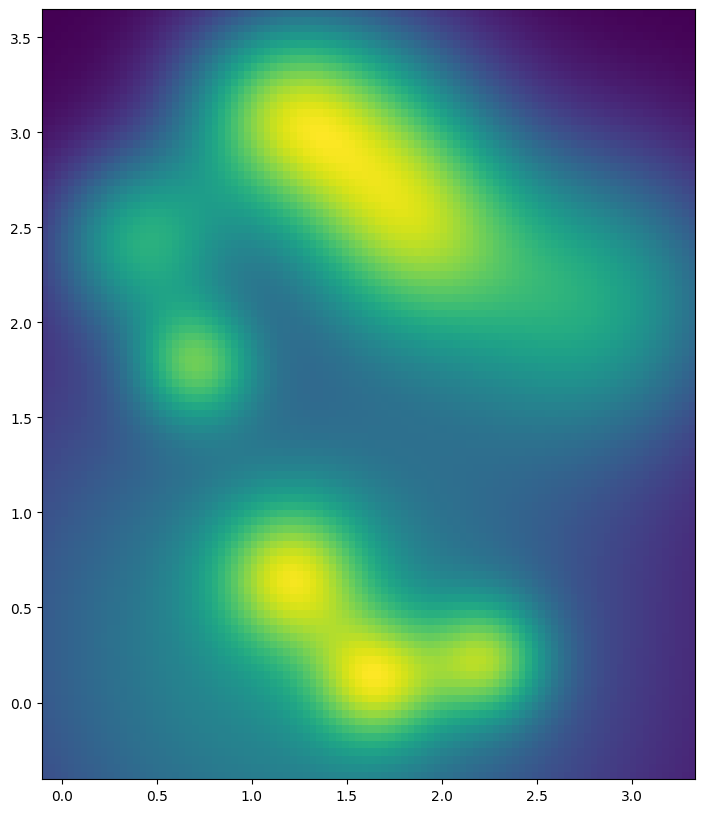

In [ ]:
from matplotlib.animation import FuncAnimation, PillowWriter

fig_size = (10,10)
fig, ax = plt.subplots(figsize=fig_size)

ax.set_xlim(xmin, xmax)
ax.set_ylim(ymin, ymax)
ax.grid(False)
ax.set_aspect('equal', adjustable='box')

def animate(j):
  k = j
  ax.clear()

  R = R_iter[k]
  alpha = alpha_iter[k]

  def phi_field(x):
    return np.einsum('i->', np.exp(np.multiply(alpha, np.squeeze(-np.square(metric(x, R))))))
  batch_phi_field = vmap(phi_field)

  phi_eval_euler = np.reshape(batch_phi_field(positions_list), (n,n))
  fgrnd1 = ax.pcolormesh(X, Y, phi_eval_euler)

  return fgrnd1

ani = FuncAnimation(fig, animate, interval=50, blit=False, repeat=True, frames=len(R_iter)-1)
ani.save("droplet_GMM_uncontrolled.gif", dpi=300, writer=PillowWriter(fps=10))